In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
airline_data = pd.read_csv('airline-passengers.csv')
airline_data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [109]:
airline_data = airline_data['Passengers'].values
airline_data

# airline_data['Passengers'].values Eextracts the "Passengers" column (i.e., the time series data) as a NumPy array.

# Why Numpy array? 
# Because, NumPy arrays store homogeneous data in contiguous memory blocks, making computations faster. 
# Pandas DataFrames, on the other hand, are designed for handling heterogeneous data types, 
# leading to inefficiencies when performing deep learning tasks.
# Pandas DataFrames offer indexing, labeled columns, and built-in methods useful for preprocessing,but RNNs focus purely 
# on numerical computation. Since Pandas introduces additional abstraction, converting to NumPy helps streamline 
# the processing pipeline.
# Therefore, before feeding data into an RNN, simply convert your Pandas DataFrame into a NumPy array using .values or .to_numpy(),
# This transformation ensures compatibility without sacrificing the flexibility of Pandas for data preprocessing.


array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [110]:
def prepare_data(data, timeperiod):
    x = []
    y = []
    for i in range(len(data)-timeperiod):
        x.append(data[i:(i+timeperiod)])
        y.append(data[i+timeperiod])
    return x,y

# Note: len(data) - timeperiod gives the number of training samples you can pick or extract from the data without going out of bounds.
# You're slicing timeperiod-long chunks from data, and each chunk must be followed by a value (y) to predict 
# which is at index i + timeperiod. The loop must stop before i + timeperiod reaches the end of the list.

# data[i:(i+timeperiod)] is Python slicing. It means:
# Take a slice of the list data starting at index i and ending before index i + timeperiod.
# Example:
# Let’s say data = [10, 20, 30, 40, 50] and timeperiod = 3.
# On the first loop (i = 0):
# data[0:3] → [10, 20, 30] (starts at index 0, ends before index 3)
# On the second loop (i = 1):
# data[1:4] → [20, 30, 40]

# This slicing helps create overlapping input sequences of fixed length (timeperiod) used for training a model to predict the 
# next value.


# X stores input sequences of length timeperiod.
# y stores the corresponding next value after each input sequence.
#Example:
# If data = [1, 2, 3, 4, 5] and timeperiod = 2, then:
# X = [[1, 2], [2, 3], [3, 4]]
# y = [3, 4, 5]
# Each input in X helps predict the next value in y.

In [111]:
x,y = prepare_data(airline_data, timeperiod = 5)

In [112]:
x

[array([112, 118, 132, 129, 121], dtype=int64),
 array([118, 132, 129, 121, 135], dtype=int64),
 array([132, 129, 121, 135, 148], dtype=int64),
 array([129, 121, 135, 148, 148], dtype=int64),
 array([121, 135, 148, 148, 136], dtype=int64),
 array([135, 148, 148, 136, 119], dtype=int64),
 array([148, 148, 136, 119, 104], dtype=int64),
 array([148, 136, 119, 104, 118], dtype=int64),
 array([136, 119, 104, 118, 115], dtype=int64),
 array([119, 104, 118, 115, 126], dtype=int64),
 array([104, 118, 115, 126, 141], dtype=int64),
 array([118, 115, 126, 141, 135], dtype=int64),
 array([115, 126, 141, 135, 125], dtype=int64),
 array([126, 141, 135, 125, 149], dtype=int64),
 array([141, 135, 125, 149, 170], dtype=int64),
 array([135, 125, 149, 170, 170], dtype=int64),
 array([125, 149, 170, 170, 158], dtype=int64),
 array([149, 170, 170, 158, 133], dtype=int64),
 array([170, 170, 158, 133, 114], dtype=int64),
 array([170, 158, 133, 114, 140], dtype=int64),
 array([158, 133, 114, 140, 145], dtype=

In [113]:
y

[135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306,
 315,
 301,
 356,
 348,
 355,
 422,
 465,
 467,
 404,
 347,
 305,
 336,
 340,
 318,
 362,
 348,
 363,
 435,
 491,
 505,
 404,
 359,
 310,
 337,
 360,
 342,
 406,
 396,
 420,
 472,
 548,
 559,
 463,
 407,
 362,
 405,
 417,
 391,
 419,
 461,
 472,
 535,
 622,
 606,
 508,
 461,
 390,
 432]

In [114]:
x = np.array(x)

In [115]:
y = np.array(y)

In [116]:
train_size = 0.7 # Setting the training size to 70% of the total data
cut = round(train_size*len(x))

# Let's say your dataset 'X' has 100 samples.
# train_size is set to 0.7.
# len(X) is 100.
# The calculation would be: round(0.7 * 100), which results in 70.
# Therefore, cut would be assigned the value 70.

In [117]:
x_train = x[:cut].reshape(-1,5,1) #This value (cut) is typically used to slice the data like: x_train = x[:cut] and x_test = x[cut:].
y_train = y[:cut]
x_test = x[cut:].reshape(-1,5,1)
y_test = y[cut:]
# RNN and LSTMs or ConV 1D require input in 3-dimensional eg: (samples, timesteps, features).

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dense
from tensorflow.keras.optimizers import Adam

In [119]:
model = Sequential()

In [120]:
model = Sequential()
model.add(SimpleRNN(units = 20, activation = 'relu', input_shape = (5,1)))
model.add(Dense(units = 10))

In [121]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [122]:
model.fit(x_train, y_train, epochs = 250, validation_data = (x_test, y_test))

Epoch 1/250
4/4 [==============================] - 3s 109ms/step - loss: 72770.7969 - val_loss: 228326.8281
Epoch 2/250
4/4 [==============================] - 0s 19ms/step - loss: 69597.2969 - val_loss: 218384.0469
Epoch 3/250
4/4 [==============================] - 0s 21ms/step - loss: 66565.8281 - val_loss: 208664.6719
Epoch 4/250
4/4 [==============================] - 0s 20ms/step - loss: 63650.3828 - val_loss: 199152.4062
Epoch 5/250
4/4 [==============================] - 0s 16ms/step - loss: 60725.8672 - val_loss: 189586.6562
Epoch 6/250
4/4 [==============================] - 0s 18ms/step - loss: 57839.8516 - val_loss: 180169.4219
Epoch 7/250
4/4 [==============================] - 0s 20ms/step - loss: 54933.0039 - val_loss: 170938.9219
Epoch 8/250
4/4 [==============================] - 0s 13ms/step - loss: 52156.7227 - val_loss: 162562.5781
Epoch 9/250
4/4 [==============================] - 0s 20ms/step - loss: 49599.8047 - val_loss: 154736.8125
Epoch 10/250
4/4 [==================

In [123]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

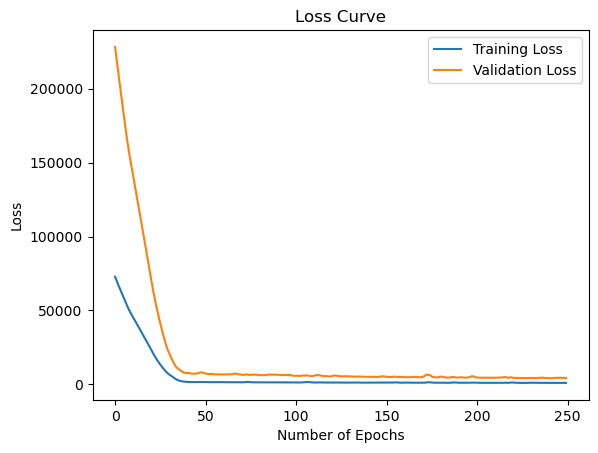

In [124]:
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

plt.plot(training_loss, label = 'Training Loss')
plt.plot(validation_loss, label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()